# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
heroes_df.drop("Unnamed: 0", axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [5]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [6]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Jack of Hearts,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:

In detecting null values, it is found that the 'Weight' and 'Publisher' columns of the heroes DataFrame contain null values. No columns within the powers DataFrame contain null values. In dealing with null values, due to the low number of values affected (see 'count' in DF.describe() above), these null values are replaced with the mean value for the numerical 'Weight' column. Publisher is a categorical column and having null values is not necessarily an issue for further analysis, where these rows may prove interesting. 
____________________________________________________________________________________________________________________________




In [7]:
heroes_df.isnull().any()

name          False
Gender        False
Eye color     False
Race          False
Hair color    False
Height        False
Publisher      True
Skin color    False
Alignment     False
Weight         True
dtype: bool

In [8]:
heroes_df.isnull().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [9]:
mean_heroes_weight = np.mean(heroes_df.Weight)
heroes_df['Weight'].fillna(mean_heroes_weight, inplace=True)
heroes_df.isnull().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         0
dtype: int64

In [10]:
powers_df.isnull().any()

hero_names               False
Agility                  False
Accelerated Healing      False
Lantern Power Ring       False
Dimensional Awareness    False
Cold Resistance          False
Durability               False
Stealth                  False
Energy Absorption        False
Flight                   False
Danger Sense             False
Underwater breathing     False
Marksmanship             False
Weapons Master           False
Power Augmentation       False
Animal Attributes        False
Longevity                False
Intelligence             False
Super Strength           False
Cryokinesis              False
Telepathy                False
Energy Armor             False
Energy Blasts            False
Duplication              False
Size Changing            False
Density Control          False
Stamina                  False
Astral Travel            False
Audio Control            False
Dexterity                False
                         ...  
Intuitive aptitude       False
Vision -

In [11]:
powers_df.isnull().any().any()

False

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [12]:
powers_df.rename(columns={'hero_names':'name'}, inplace=True)

In [13]:
powers_df  = powers_df.astype('str')

In [14]:
powers_and_heroes_join_df = powers_df.set_index('name').join(heroes_df.set_index('name'), how='inner')
powers_and_heroes_join_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

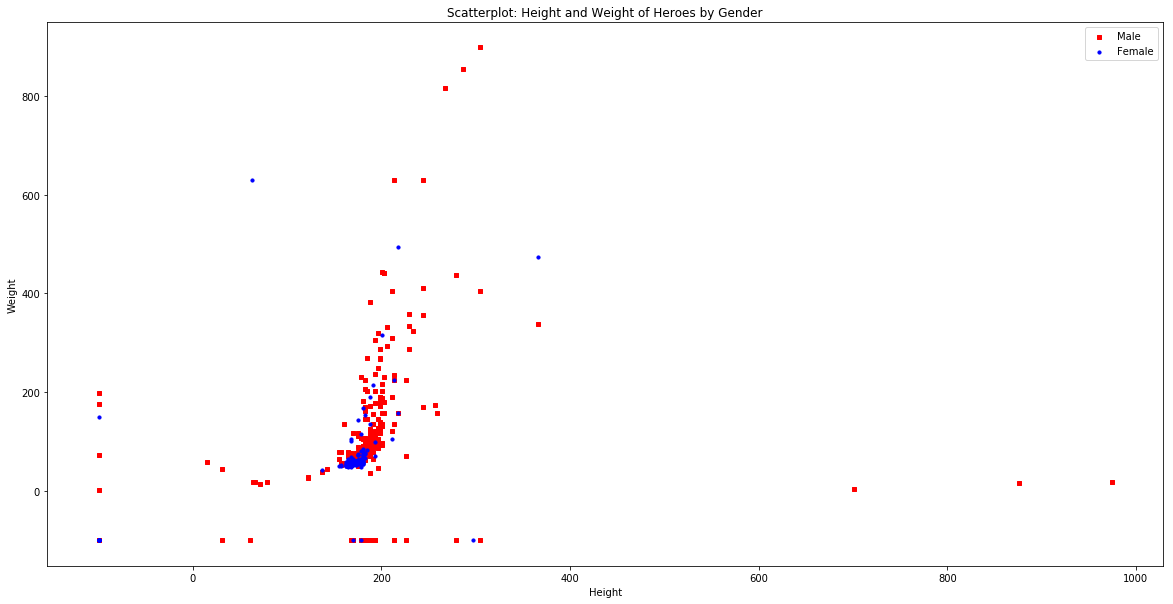

In [74]:
male_heroes_df = heroes_df[heroes_df['Gender'] == 'Male']
female_heroes_df = heroes_df[heroes_df['Gender'] == 'Female']
plt.figure(figsize=(20,10))
plt.scatter(male_heroes_df.Height, male_heroes_df.Weight, s=10, c='r', marker="s", label='Male')
plt.scatter(female_heroes_df.Height, female_heroes_df.Weight, s=10, c='b', marker="o", label='Female')
plt.legend(loc='upper right');
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatterplot: Height and Weight of Heroes by Gender')
plt.show()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [15]:
def show_distplot(dataframe, gender, column_name):
    plt.plot()
    sns.distplot(dataframe[column_name])
    plt.title("DistPlot: {} for {} Heroes".format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel("Probability Density")
    plt.show()

C:\Users\IBM\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


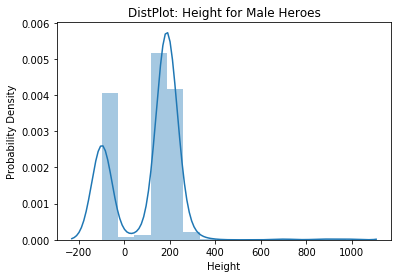

Male heroes mean: 107.27524752475247
Male heroes median: 180.0
Male heroes mode: -99.0


In [29]:
# Male Height
from statistics import mode
show_distplot(male_heroes_df, 'Male', 'Height')
print("Male heroes mean: {}".format(np.mean(male_heroes_df.Height)))
print("Male heroes median: {}".format(np.median(male_heroes_df.Height)))
print("Male heroes mode: {}".format(mode(male_heroes_df.Height)))

C:\Users\IBM\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


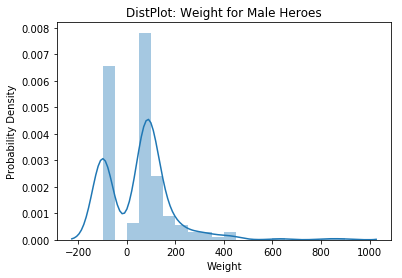

Male heroes mean: 52.03535681436996
Male heroes median: 79.0
Male heroes mode: -99.0


In [30]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')
print("Male heroes mean: {}".format(np.mean(male_heroes_df.Weight)))
print("Male heroes median: {}".format(np.median(male_heroes_df.Weight)))
print("Male heroes mode: {}".format(mode(male_heroes_df.Weight)))

C:\Users\IBM\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


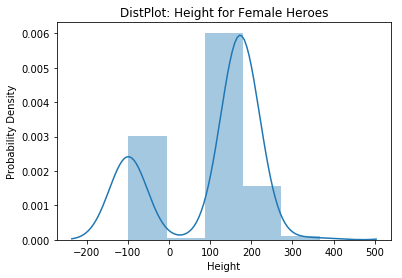

Female heroes mean: 98.0525
Female heroes median: 168.0
Female heroes mode: -99.0


In [31]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')
print("Female heroes mean: {}".format(np.mean(female_heroes_df.Height)))
print("Female heroes median: {}".format(np.median(female_heroes_df.Height)))
print("Female heroes mode: {}".format(mode(female_heroes_df.Height)))

C:\Users\IBM\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


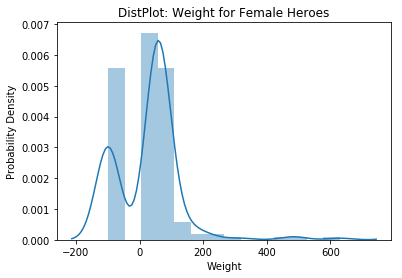

Female heroes mean: 27.265
Female heroes median: 54.0
Female heroes mode: -99.0


In [32]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')
print("Female heroes mean: {}".format(np.mean(female_heroes_df.Weight)))
print("Female heroes median: {}".format(np.median(female_heroes_df.Weight)))
print("Female heroes mode: {}".format(mode(female_heroes_df.Weight)))

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:

The distributions of height and weight for both genders -- male and female -- are bimodal with great variability and many large outliers, skewing distirbutions right. On summary statistics, for

Male Height:
mean: 107.27524752475247
median: 180.0
mode: -99.0

Male Weight:
mean: 52.03535681436996
median: 79.0
mode: -99.0

Female Height:
mean: 98.0525
median: 168.0
mode: -99.0

Female Weight:
mean: 27.265
median: 54.0
mode: -99.0

For Height, the male mean and median values are greater than those for females. The mode values are equal. 
For Weight, the male mean and median values are greater than those for females. The mode values are equal.
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [20]:
def most_common_5_powers(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1)
    columns = df.columns.values
    for col in columns:
        df[col] = df[col].map({"True": 1, "False": 0})        
    power_counts = dict(df.sum())    
    return sorted(power_counts.items(), key=lambda x: x[1], reverse=True)[:5] 
    
marvel_df = powers_and_heroes_join_df[powers_and_heroes_join_df['Publisher'] == 'Marvel Comics']
dc_df = powers_and_heroes_join_df[powers_and_heroes_join_df['Publisher'] == 'DC Comics']

overall_5_most_common_powers = most_common_5_powers(powers_and_heroes_join_df)
print(overall_5_most_common_powers)

[('Super Strength', 362), ('Stamina', 294), ('Durability', 262), ('Super Speed', 251), ('Agility', 244)]


In [21]:
marvel_5_most_common_powers = most_common_5_powers(marvel_df)
print(marvel_5_most_common_powers)

[('Super Strength', 204), ('Durability', 154), ('Stamina', 150), ('Super Speed', 137), ('Agility', 126)]


In [22]:
dc_5_most_common_powers = most_common_5_powers(dc_df)
print(dc_5_most_common_powers)

[('Super Strength', 109), ('Stamina', 90), ('Flight', 86), ('Super Speed', 79), ('Agility', 71)]


<Figure size 432x288 with 0 Axes>

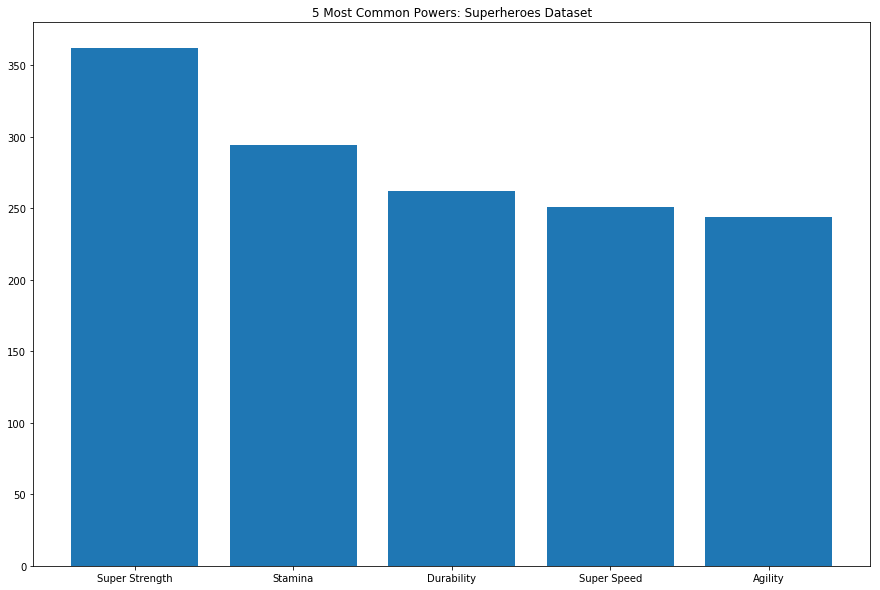

In [23]:
def most_common_5_powers_barchart(most_common_5_powers_list, publisher=None):
    subset_powers = [i[0] for i in most_common_5_powers_list]
    subset_values = [i[1] for i in most_common_5_powers_list]
    plt.clf()
    plt.figure(figsize=(15, 10))
    plt.bar(range(0,len(subset_powers)), subset_values)
    plt.xticks(range(0,len(subset_powers)),subset_powers)
    if publisher:
        plt.title("5 Most Common Powers: the {} Universe".format(publisher))
    else:
        plt.title("5 Most Common Powers: Superheroes Dataset")
    plt.show()

<Figure size 432x288 with 0 Axes>

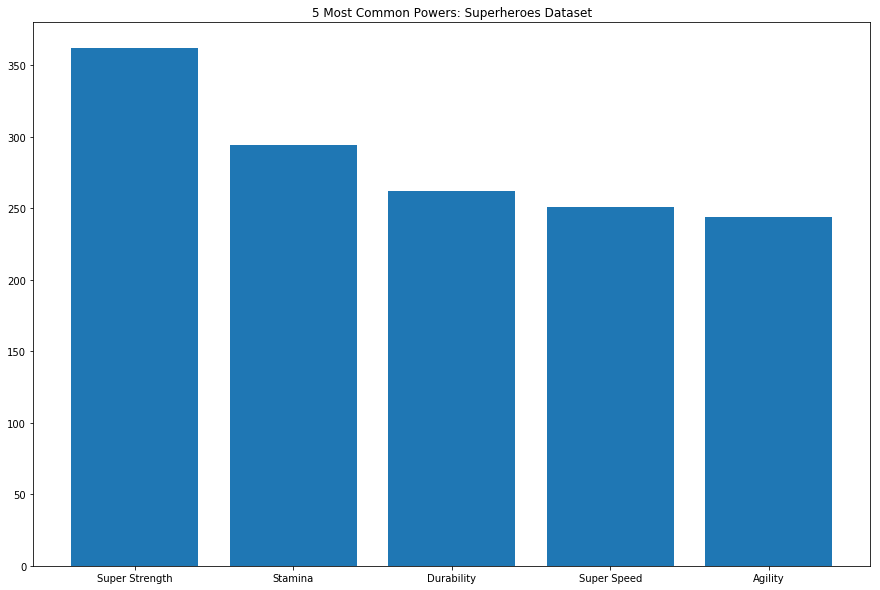

<Figure size 432x288 with 0 Axes>

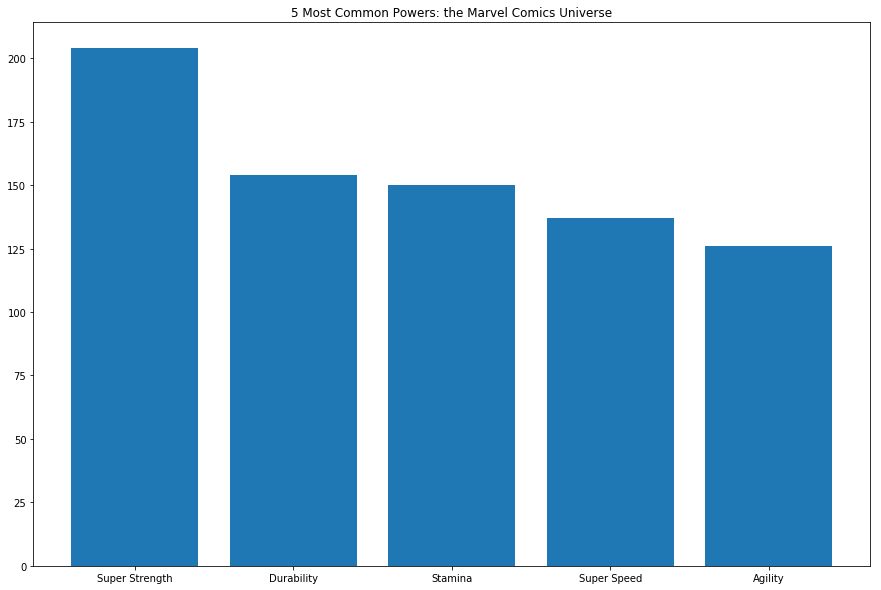

<Figure size 432x288 with 0 Axes>

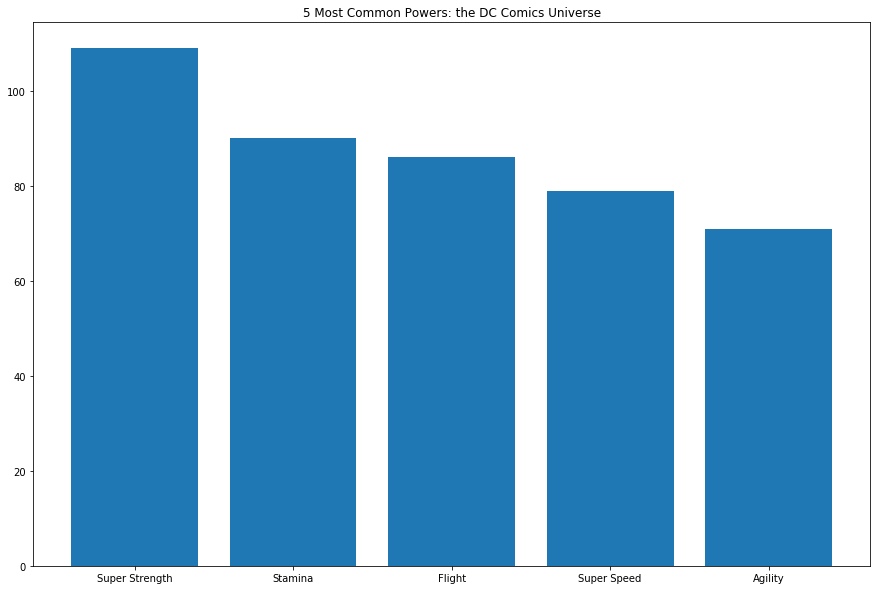

In [25]:
most_common_5_powers_barchart(overall_5_most_common_powers)
most_common_5_powers_barchart(marvel_5_most_common_powers, publisher="Marvel Comics")
most_common_5_powers_barchart(dc_5_most_common_powers, publisher="DC Comics")

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:

The top 5 powers overall are:
'Super Strength' = 362
'Stamina' = 294 
'Durability'= 262
'Super Speed' = 251
'Agility'= 244

The top 5 Marvel powers are:
'Super Strength' = 204 
'Durability' = 154 
'Stamina' = 150
'Super Speed' = 137 
'Agility' = 126

The top 5 DC powers are:
'Super Strength' = 109 
'Stamina' = 90 
'Flight' = 86 
'Super Speed' = 79 
'Agility' = 71

The top 5 powers for Marvel and DC share 4 of 5 powers: 'Super Strength', 'Stamina', 'Super Speed', and 'Agility'. The power lists are similar, with 'Super Strength' first, 'Super Speed' fourth, and 'Agility' fifth for both lists. Marvel and DC lists are also similar to the overall trends in teh entire Superheroes dataset: 'Super Strength' is also first, 'Super Speed' also fourth, and 'Agility' also fifth.
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________

Question: What is the distribution of skin colors amongst alien heroes and how does this compare with non-human and human heroes?

For alien heroes:
Skin Color | Count
NaN       3
grey      1
silver    1
gold      1
green     1

For nonhuman heroes:
Skin Color | Count
NaN               462
green              19
red                 8
blue                8
silver              5
white               5
grey                4
gold                3
pink                2
yellow              2
purple              2
gray                1
orange              1
blue-white          1
red / black         1
black               1
orange / white      1

For human heroes:
Skin Color | Count
NaN         200
white       2
green       2
grey        1
red         1
blue        1
purple      1

Grey and green skin colors are found within all 3 lists. NaN values have the largest count in all lists for this categorical variable. Green is the largest non-NaN value for nonhuman heroes. Grey is this values for alien heroes. White and green are tied for this value for human heroes. All distributions have are predominantly composed of skin colors with low counts. 

Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [26]:
heroes_df.Race.value_counts()

-                    304
Human                208
Mutant                63
God / Eternal         14
Human / Radiation     11
Cyborg                11
Android                9
Symbiote               9
Alien                  7
Kryptonian             7
Demon                  6
Asgardian              5
Atlantean              5
Alpha                  5
Animal                 4
Cosmic Entity          4
Inhuman                4
Human / Altered        3
New God                3
Saiyan                 2
Amazon                 2
Metahuman              2
Human-Kree             2
Eternal                2
Frost Giant            2
Vampire                2
Human / Cosmic         2
Demi-God               2
Yautja                 1
Korugaran              1
                    ... 
Maiar                  1
Strontian              1
Human-Vuldarian        1
Human / Clone          1
Human-Vulcan           1
Zombie                 1
Luphomoid              1
Icthyo Sapien          1
Gorilla                1


In [64]:
alien_df = heroes_df[heroes_df['Race'] == 'Alien']
alien_df['Skin color'].value_counts()

-         3
grey      1
silver    1
gold      1
green     1
Name: Skin color, dtype: int64

Text(0, 0.5, 'Count')

<Figure size 432x288 with 0 Axes>

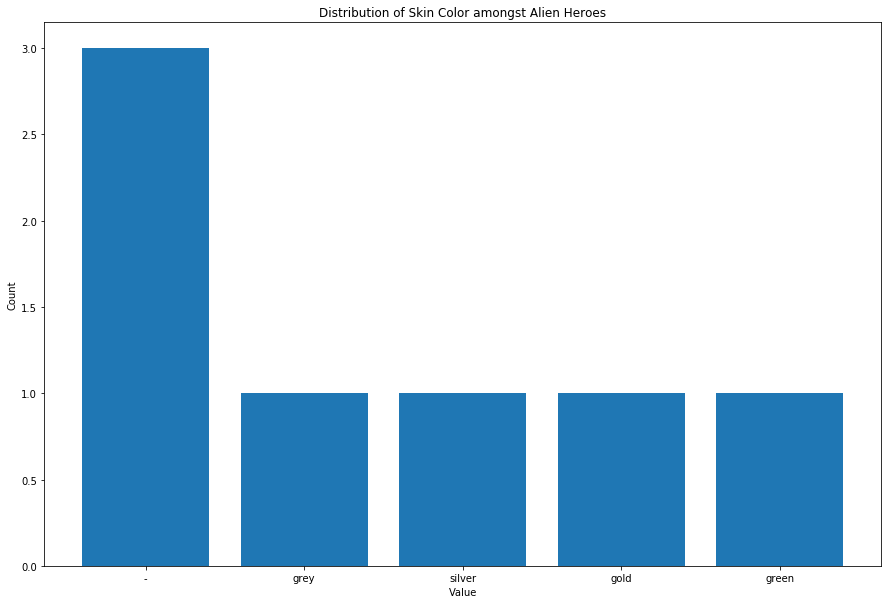

In [60]:
plt.clf()
plt.figure(figsize=(15, 10))
plt.bar(alien_df['Skin color'].value_counts().index, alien_df['Skin color'].value_counts())
plt.title('Distribution of Skin Color amongst Alien Heroes')
plt.xlabel('Value')
plt.ylabel('Count')

In [66]:
nonhuman_df = heroes_df[heroes_df['Race'] != 'Human']
nonhuman_df['Skin color'].value_counts()

-                 462
green              19
red                 8
blue                8
silver              5
white               5
grey                4
gold                3
pink                2
yellow              2
purple              2
gray                1
orange              1
blue-white          1
red / black         1
black               1
orange / white      1
Name: Skin color, dtype: int64

Text(0, 0.5, 'Count')

<Figure size 432x288 with 0 Axes>

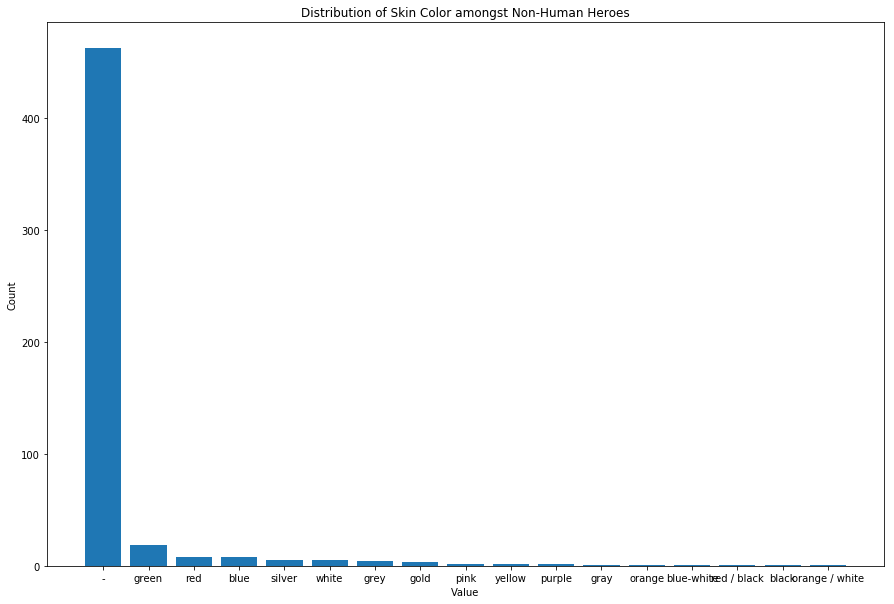

In [67]:
plt.clf()
plt.figure(figsize=(15, 10))
plt.bar(nonhuman_df['Skin color'].value_counts().index, nonhuman_df['Skin color'].value_counts())
plt.title('Distribution of Skin Color amongst Non-Human Heroes')
plt.xlabel('Value')
plt.ylabel('Count')

In [68]:
human_df = heroes_df[heroes_df['Race'] == 'Human']
human_df['Skin color'].value_counts()

-         200
white       2
green       2
grey        1
red         1
blue        1
purple      1
Name: Skin color, dtype: int64

Text(0, 0.5, 'Count')

<Figure size 432x288 with 0 Axes>

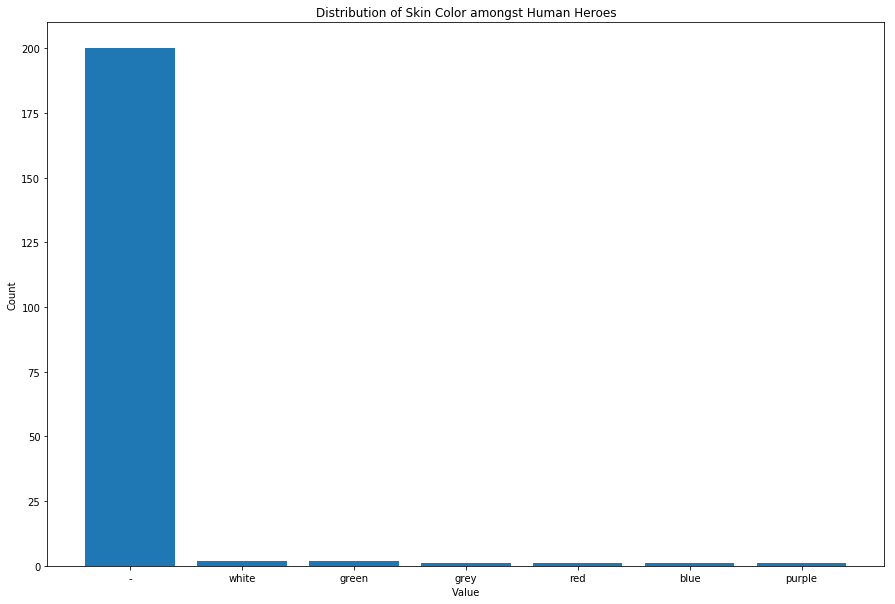

In [69]:
plt.clf()
plt.figure(figsize=(15, 10))
plt.bar(human_df['Skin color'].value_counts().index, human_df['Skin color'].value_counts())
plt.title('Distribution of Skin Color amongst Human Heroes')
plt.xlabel('Value')
plt.ylabel('Count')

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data